**1. Понимание бизнеса**

**1.1 Цель**

Предсказать класс вина на основе химических показателей

**1.2 Описание**

Набор данных для распознавания вина
------------------------

**Характеристики Набора Данных:**

:Количество экземпляров: 178 (по 50 в каждом из трех классов)
:Количество атрибутов: 13 числовых, прогностических атрибутов и класс
:Информация об Атрибутах:
- Алкоголь
- Яблочная кислота
- Эш
- Щелочность золы
- Магний
- Общее количество фенолов
- Флаваноиды
- Нефлаваноидные фенолы
- Проантоцианы
- Интенсивность цвета
- Оттенок
- OD280/OD315 разбавленных вин
- Пролин

- класс:
- класс_0
- класс_1
- класс_2

:Сводная статистика:

============================= ==== ===== ======= =====
Минимальное Максимальное среднее SD
============================= ==== ===== ======= =====
Алкоголь: 11,0 14,8 13,0 0,8
Яблочная кислота: 0,74 5,80 2,34 1,12
Пепел: 1.36 3.23 2.36 0.27
Щелочность золы: 10,6 30,0 19,5 3,3
Магний: 70,0 162,0 99,7 14,3
Общее количество фенолов: 0,98 3,88 2,29 0,63
Флаваноиды: 0,34 5,08 2,03 1,00
Нефлаваноидные фенолы: 0,13 0,66 0,36 0,12
Проантоцианины: 0,41 3,58 1,59 0,57
Интенсивность цвета: 1.3 13.0 5.1 2.3
Оттенок: 0,48 1,71 0,96 0,23
OD280/OD315 разбавленных вин: 1.27 4.00 2.61 0.71
Пролин: 278 1680 746 315
============================= ==== ===== ======= =====

:Отсутствуют Значения атрибутов: Нет
:Распределение по классам: class_0 (59), class_1 (71), class_2 (48)
:Создатель: Р. А. Фишер
:Донор: Майкл Маршалл (MARSHALL%PLU@io.arc.nasa.gov)
:Дата: Июль 1988 года

Это копия наборов данных распознавания вина UCI ML.
https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

Эти данные являются результатами химического анализа вин, выращенных в одном и том же
регионе Италии тремя разными культиваторами. Существует тринадцать различных
измерений, проведенных для различных компонентов, содержащихся в трех типах
вина.

Первоначальные Владельцы:

Форина, М. и др., ПАРВУС -
Расширяемый пакет для исследования, Классификации и корреляции данных.
Институт фармацевтического и пищевого анализа и технологий,
Via Brigata Салерно, 16147 Генуя, Италия.

Цитирование:

Личман, М. (2013). Репозиторий машинного обучения UCI
[https://archive.ics.uci.edu/ml]. Ирвин, Калифорния: Калифорнийский университет,
Школа информатики и компьютерных наук.

.. тема:: Список литературы

(1) С. Эберхард, Д. Куманс и О. де Вель,
Сравнение классификаторов в условиях высокой размерности,
Технический представитель № 92-02, (1992), Кафедра компьютерных наук и кафедра
Математика и статистика, Университет Джеймса Кука в Северном Квинсленде.
(Также представлено в Technometrics).

Эти данные использовались вместе со многими другими для сравнения различных
классификаторов. Классы разделимы, хотя только RDA
добился 100% правильной классификации.
(RDA : 100%, QDA 99,4%, LDA 98,9%, 1NN 96,1% (z-преобразованные данные))
(Все результаты с использованием метода "оставить один выход")

(2) С. Эберхард, Д. Куманс и О. де Вель,
"ЭФФЕКТИВНОСТЬ КЛАССИФИКАЦИИ RDA"
Технический представитель № 92-01, (1992), Кафедра компьютерных наук и кафедра
Математика и статистика, Университет Джеймса Кука в Северном Квинсленде.
(Также представлено в Journal of Chemometrics).

**2. Анализ данных**

**2.1 Импорт библиотек**



In [11]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

**2.2 Инструменты для визуализации**

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

**2.3 Загрузка данных**

In [3]:
wine = load_wine()

In [4]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

**2.4 Статистика и визуализация**



In [8]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


  Описание переменных:

 		- Alcohol - Алкоголь
 		- Malic acid - Яблочная кислота
 		- Ash - зола
		- Alcalinity of ash  - Щелочность золы
 		- Magnesium - Магний
		- Total phenols -Общее количество фенолов
 		- Flavanoids - Флаваноиды
 		- Nonflavanoid phenols - Нефлаваноидные фенолы
 		- Proanthocyanins -Проантоцианы
		- Color intensity - Интенсивность цвета
 		- Hue - Оттенок
 		- OD280/OD315 of diluted wines - OD280/OD315 разбавленных вин
 		- Proline -Пролин

    - class:
            - class_0
            - class_1
            - class_2

     














**2.4.1 Ключевая информация о переменных**



In [9]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**2.4.2 Тепловая карта корреляции - определяем какие переменные важны**



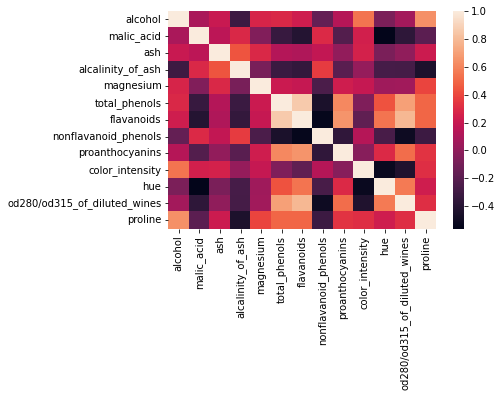

In [13]:
# calculate the correlation matrix
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

**3. Подготовка данных и создание датасетов**



In [14]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

**4. Моделирование**


In [15]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

**4.1.Выбор модели - LDA**



In [16]:
lda = LinearDiscriminantAnalysis()

**4.2 Обучение модели**



In [17]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [18]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 0, 2,
       0, 1, 1, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1,
       0])

**5. Оценка**



In [21]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test, lda.predict(X_test))

0.9777777777777777

In [23]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 3.31641248e+00, -1.71721790e-01,  3.89274055e+00,
        -8.33619892e-01,  2.45129226e-02, -5.93953078e-01,
         4.80923096e+00,  2.19229636e+00, -2.02011323e+00,
        -1.01661703e+00, -3.03374982e+00,  3.57252565e+00,
         1.45993574e-02],
       [-2.23871472e+00, -6.65151591e-01, -5.29884550e+00,
         3.24772214e-01,  4.85417947e-03, -1.16711838e+00,
         1.88103233e+00,  2.07605694e+00,  1.02207146e+00,
        -6.91645308e-01,  4.93157920e+00, -1.35063505e-01,
        -6.47185594e-03],
       [-3.47124373e-01,  1.17902516e+00,  3.56308486e+00,
         4.40971454e-01, -3.43786404e-02,  2.39306992e+00,
        -8.12527696e+00, -5.51533196e+00,  7.19208441e-01,
         2.15464298e+00, -3.96900307e+00, -3.75797456e+00,
        -6.55733995e-03]])

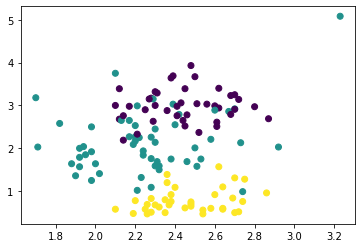

In [24]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['ash'], X_train['flavanoids'], c=y_train)
plt.show()

In [25]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['ash', 'flavanoids']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['ash', 'flavanoids']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

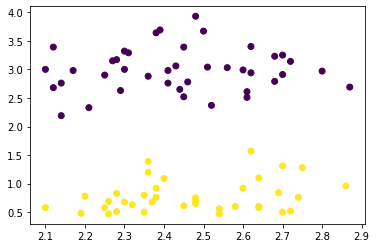

In [26]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
plt.show()

In [27]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [28]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.43804878, 2.9904878 ],
       [2.46594595, 0.77972973]])

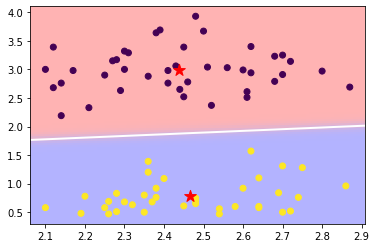

In [29]:
# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [30]:
# второй признак в 17 раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[  5.80572567, -19.67276445]])

In [31]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [33]:
# заменим модель на логистическую регресиию

from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression()

In [35]:
lr.fit(small_train, sy_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
lr.predict(small_test)

array([2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0])

In [37]:
accuracy_score(sy_test, lr.predict(small_test))

1.0

In [38]:
lr.coef_

array([[ 0.20358237, -3.07201563]])

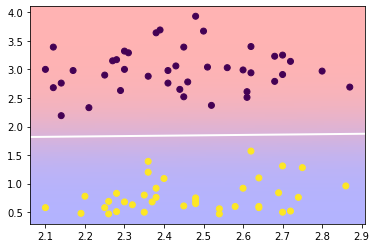

In [39]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

**6. Развертывание**



In [19]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [20]:
result

,0,1
0,2,2
1,1,1
2,0,0
3,0,0
4,0,0
5,2,1
6,2,2
7,0,0
8,1,1
9,1,1
